<a href="https://colab.research.google.com/github/gloriagutierrez2025/Challenger_segunda_parte/blob/main/Challenger_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTACION LIBRERIAS**

In [151]:
import pandas as pd
import seaborn as sns
import numpy as np
import requests
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import PrecisionRecallDisplay

**EXTRACCION DE DATOS**

In [152]:
datos=pd.read_csv('/content/dataset_limpio.csv')

In [153]:
datos.head()

,ID,cancelo,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40


In [154]:
datos=datos.drop(columns='ID')

In [155]:
datos.columns

Index(['cancelo', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')

In [156]:
datos.rename(columns={
    'cancelo': 'cancelacion',
    'customer_gender': 'genero',
    'customer_SeniorCitizen': 'adulto_mayor',
    'customer_Partner': 'tiene_pareja',
    'customer_Dependents': 'tiene_dependientes',
    'customer_tenure': 'antiguedad_meses',
    'phone_PhoneService': 'servicio_telefonico',
    'phone_MultipleLines': 'lineas_multiples',
    'internet_InternetService': 'servicio_internet',
    'internet_OnlineSecurity': 'seguridad_en_linea',
    'internet_OnlineBackup': 'respaldo_en_linea',
    'internet_DeviceProtection': 'proteccion_dispositivo',
    'internet_TechSupport': 'soporte_tecnico',
    'internet_StreamingTV': 'streaming_tv',
    'internet_StreamingMovies': 'streaming_peliculas',
    'account_Contract': 'tipo_contrato',
    'account_PaperlessBilling': 'facturacion_electronica',
    'account_PaymentMethod': 'metodo_pago',
    'account_Charges_Day': 'total_dia',
    'account_Charges_Monthly': 'cargo_mensual',
    'account_Charges_Total': 'cargo_total'
}, inplace=True)

**EXPLORACION DE DATOS**

In [157]:
df=datos
df

,cancelacion,genero,adulto_mayor,tiene_pareja,tiene_dependientes,antiguedad_meses,servicio_telefonico,lineas_multiples,servicio_internet,seguridad_en_linea,respaldo_en_linea,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,facturacion_electronica,metodo_pago,cargo_mensual,cargo_total
0,0,Female,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30
1,0,Male,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40
2,1,Male,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85
3,1,Male,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85
4,1,Female,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Female,0,0,0,13,1,No,DSL,Yes,No,No,Yes,No,No,One year,0,Mailed check,55.15,742.90
7039,1,Male,0,1,0,22,1,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.70
7040,0,Male,0,0,0,2,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75
7041,0,Male,0,1,1,67,1,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65


In [158]:
df.shape

(7043, 20)

In [159]:
px.histogram(datos, x = 'cancelacion', text_auto = True)

In [160]:
px.histogram(datos, x = 'genero', text_auto = True, color = 'cancelacion', barmode = 'group')

In [161]:
px.histogram(datos, x = 'adulto_mayor', text_auto = True, color = 'cancelacion', barmode = 'group')

In [162]:
px.histogram(datos, x = 'tiene_pareja', text_auto = True, color = 'cancelacion', barmode = 'group')

In [163]:
px.histogram(datos, x = 'tiene_dependientes', text_auto = True, color = 'cancelacion', barmode = 'group')

In [164]:
px.histogram(datos, x = 'antiguedad_meses', text_auto = True, color = 'cancelacion', barmode = 'group')

In [165]:
px.histogram(datos, x = 'servicio_telefonico', text_auto = True, color = 'cancelacion', barmode = 'group')

In [166]:
px.histogram(datos, x = 'seguridad_en_linea', text_auto = True, color = 'cancelacion', barmode = 'group')

In [167]:
px.histogram(datos, x = 'respaldo_en_linea', text_auto = True, color = 'cancelacion', barmode = 'group')

In [168]:
px.histogram(datos, x = 'proteccion_dispositivo', text_auto = True, color = 'cancelacion', barmode = 'group')

In [169]:
px.histogram(datos, x = 'soporte_tecnico', text_auto = True, color = 'cancelacion', barmode = 'group')

In [170]:
px.histogram(datos, x = 'streaming_tv', text_auto = True, color = 'cancelacion', barmode = 'group')

In [171]:
px.histogram(datos, x = 'streaming_peliculas', text_auto = True, color = 'cancelacion', barmode = 'group')

In [172]:
px.histogram(datos, x = 'tipo_contrato', text_auto = True, color = 'cancelacion', barmode = 'group')

In [173]:
px.histogram(datos, x = 'facturacion_electronica', text_auto = True, color = 'cancelacion', barmode = 'group')

In [174]:
px.histogram(datos, x = 'metodo_pago', text_auto = True, color = 'cancelacion', barmode = 'group')

In [175]:
px.histogram(datos, x = 'cargo_mensual', text_auto = True, color = 'cancelacion', barmode = 'group')

In [176]:
px.histogram(datos, x = 'cargo_total', text_auto = True, color = 'cancelacion', barmode = 'group')

In [177]:
px.box(datos, x = 'antiguedad_meses', color = 'cancelacion')

**SEPARANDO VARIABLES X -Y**

In [178]:
print(df.columns.tolist())

['cancelacion', 'genero', 'adulto_mayor', 'tiene_pareja', 'tiene_dependientes', 'antiguedad_meses', 'servicio_telefonico', 'lineas_multiples', 'servicio_internet', 'seguridad_en_linea', 'respaldo_en_linea', 'proteccion_dispositivo', 'soporte_tecnico', 'streaming_tv', 'streaming_peliculas', 'tipo_contrato', 'facturacion_electronica', 'metodo_pago', 'cargo_mensual', 'cargo_total']


In [179]:
y = df["cancelacion"]

In [180]:
X = df.drop(columns=["cancelacion"])

In [181]:
cat_cols = X.select_dtypes(include=["object","category"]).columns.tolist()
num_cols = X.select_dtypes(include="number").columns.tolist()

In [182]:
preprocess = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
], remainder="passthrough")

In [183]:
model = Pipeline([
    ("prep", preprocess),
    ("clf", LogisticRegression(max_iter=1000))
])

In [184]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [185]:
model.fit(X_train, y_train)
print("Score en test:", model.score(X_test, y_test))

Score en test: 0.7927608232789212


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



**PROPORCION CLIENTES QUE CANCELARON Y LOS QUE SE MANTIENEN ACTIVOS**

In [186]:
conteo = df["cancelacion"].value_counts()
print(conteo)

cancelacion
0    5174
1    1869
Name: count, dtype: int64


In [187]:
proporcion = df["cancelacion"].value_counts(normalize=True) * 100
print(proporcion)

cancelacion
0    73.463013
1    26.536987
Name: proportion, dtype: float64


**Evaluando si hay desbalance**

In [188]:
if proporcion.min() < 40:
    print("Existe desbalance de clases")
else:
    print("Las clases están balanceadas")

Existe desbalance de clases


**Normalizando**


In [189]:
candidates_by_name = [c for c in df.columns if any(k in c.lower() for k in ['cancel','cancelo','cancelacion'])]
binary_cols = [c for c in df.columns if set(df[c].dropna().unique()).issubset({0,1})]

target_col = None
if candidates_by_name:
    for c in candidates_by_name:
        if c in binary_cols:
            target_col = c
            break
    if target_col is None:
        target_col = candidates_by_name[0]
elif binary_cols:
    target_col = binary_cols[0]
else:
    two_val = [c for c in df.columns if df[c].nunique(dropna=False)==2]
    if two_val:
        target_col = two_val[0]

if target_col is None:
    raise RuntimeError("No se detectó columna objetivo binaria automáticamente. Indica el nombre exacto de la columna objetivo.")

print("Columna objetivo detectada:", target_col)

Columna objetivo detectada: cancelacion


In [190]:
id_cols = [c for c in df.columns if ("id" in c.lower() or "ident" in c.lower()) and c != target_col]
if id_cols:
    print("Se removerán columnas identificador:", id_cols)

y = df[target_col].copy()
X = df.drop(columns=[target_col] + id_cols, errors="ignore")

Se removerán columnas identificador: ['seguridad_en_linea']


In [191]:
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
bool_cols = X.select_dtypes(include=["bool"]).columns.tolist()
num_cols_all = X.select_dtypes(include=[np.number]).columns.tolist()

In [192]:
if bool_cols:
    X[bool_cols] = X[bool_cols].astype("uint8")
    num_cols_all = list(set(num_cols_all + bool_cols))

In [193]:
binary_numerical = [c for c in num_cols_all if set(X[c].dropna().unique()).issubset({0,1})]
continuous_cols = [c for c in num_cols_all if c not in binary_numerical]

In [194]:
print("Categóricas detectadas:", cat_cols)
print("Numéricas binarias (no normalizar):", binary_numerical)
print("Continuas a normalizar (MinMax):", continuous_cols)

Categóricas detectadas: ['genero', 'lineas_multiples', 'servicio_internet', 'respaldo_en_linea', 'proteccion_dispositivo', 'soporte_tecnico', 'streaming_tv', 'streaming_peliculas', 'tipo_contrato', 'metodo_pago']
Numéricas binarias (no normalizar): ['adulto_mayor', 'tiene_pareja', 'tiene_dependientes', 'servicio_telefonico', 'facturacion_electronica']
Continuas a normalizar (MinMax): ['antiguedad_meses', 'cargo_mensual', 'cargo_total']


In [195]:
if continuous_cols:
    rangos_antes = pd.DataFrame({"min": X[continuous_cols].min(), "max": X[continuous_cols].max()})
    print("\nRangos ANTES (continuas):\n", rangos_antes)


Rangos ANTES (continuas):
                     min      max
antiguedad_meses   0.00    72.00
cargo_mensual     18.25   118.75
cargo_total       18.80  8684.80


In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\nShapes: X_train, X_test:", X_train.shape, X_test.shape)


Shapes: X_train, X_test: (5634, 18) (1409, 18)


In [197]:
try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
except TypeError:
    # versiones antiguas de sklearn usan 'sparse' en lugar de 'sparse_output'
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

In [198]:
transformers = []
if continuous_cols:
    transformers.append(("num", MinMaxScaler(), continuous_cols))
if cat_cols:
    transformers.append(("cat", ohe, cat_cols))

preprocessor = ColumnTransformer(transformers=transformers, remainder="drop")

In [199]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                 ['antiguedad_meses', 'cargo_mensual',
                                  'cargo_total']),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['genero', 'lineas_multiples',
                                  'servicio_internet', 'respaldo_en_linea',
                                  'proteccion_dispositivo', 'soporte_tecnico',
                                  'streaming_tv', 'streaming_peliculas',
                                  'tipo_contrato', 'metodo_pago'])])

In [200]:
X_train_t = preprocessor.transform(X_train)
X_test_t  = preprocessor.transform(X_test)

In [201]:
feature_names = []
if continuous_cols:
    feature_names.extend(continuous_cols)
if cat_cols:
    # obtener nombres OHE (compatible con distintas versiones)
    try:
        cat_names = preprocessor.named_transformers_["cat"].get_feature_names_out(cat_cols).tolist()
    except Exception:
        # Si no está disponible, crear nombres manuales (menos ideal)
        cat_names = []
        for c in cat_cols:
            uniques = X_train[c].astype(str).unique().tolist()
            cat_names.extend([f"{c}__{str(u)}" for u in uniques])
    feature_names.extend(cat_names)

In [202]:
X_train_t_df = pd.DataFrame(X_train_t, columns=feature_names, index=X_train.index).reset_index(drop=True)
X_test_t_df  = pd.DataFrame(X_test_t,  columns=feature_names, index=X_test.index).reset_index(drop=True)

In [203]:
if continuous_cols:
    rangos_despues = pd.DataFrame({
        "min_after": X_train_t_df[continuous_cols].min().round(6),
        "max_after": X_train_t_df[continuous_cols].max().round(6)
    })
    print("\nRangos DESPUÉS (continuas, train):\n", rangos_despues)


Rangos DESPUÉS (continuas, train):
                   min_after  max_after
antiguedad_meses        0.0        1.0
cargo_mensual           0.0        1.0
cargo_total             0.0        1.0


**CORRELACION Y SELECCION DE VARIABLES**

In [204]:
df_num = df.select_dtypes(include=["int64", "float64"])
print("Columnas numéricas:\n", df_num.columns.tolist())

Columnas numéricas:
 ['cancelacion', 'adulto_mayor', 'tiene_pareja', 'tiene_dependientes', 'antiguedad_meses', 'servicio_telefonico', 'facturacion_electronica', 'cargo_mensual', 'cargo_total']


In [205]:
corr_matrix = df_num.corr()

**Los clientes que tienen más antiguedad, muestran una correlación -0,35 lo que refleja que tienden a cancelar menos en comparación con quienes llevan menos tiempo**

In [206]:
print(corr_matrix["cancelacion"].sort_values(ascending=False))

cancelacion                1.000000
cargo_mensual              0.193356
facturacion_electronica    0.191825
adulto_mayor               0.150889
servicio_telefonico        0.011942
tiene_pareja              -0.150448
tiene_dependientes        -0.164221
cargo_total               -0.199428
antiguedad_meses          -0.352229
Name: cancelacion, dtype: float64


/tmp/ipython-input-2309284199.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Relación entre Antigüedad (tenure) y Cancelación')

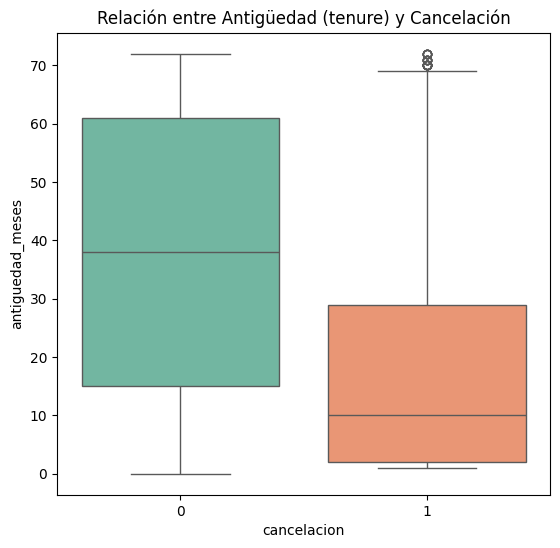

In [207]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(x="cancelacion", y="antiguedad_meses", data=df, palette="Set2")
plt.title("Relación entre Antigüedad (tenure) y Cancelación")



/tmp/ipython-input-1427299535.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




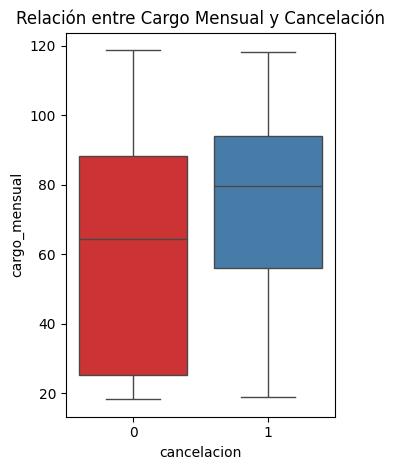

In [208]:
plt.subplot(1,2,2)
sns.boxplot(x="cancelacion", y="cargo_mensual", data=df, palette="Set1")
plt.title("Relación entre Cargo Mensual y Cancelación")
plt.tight_layout()
plt.show()

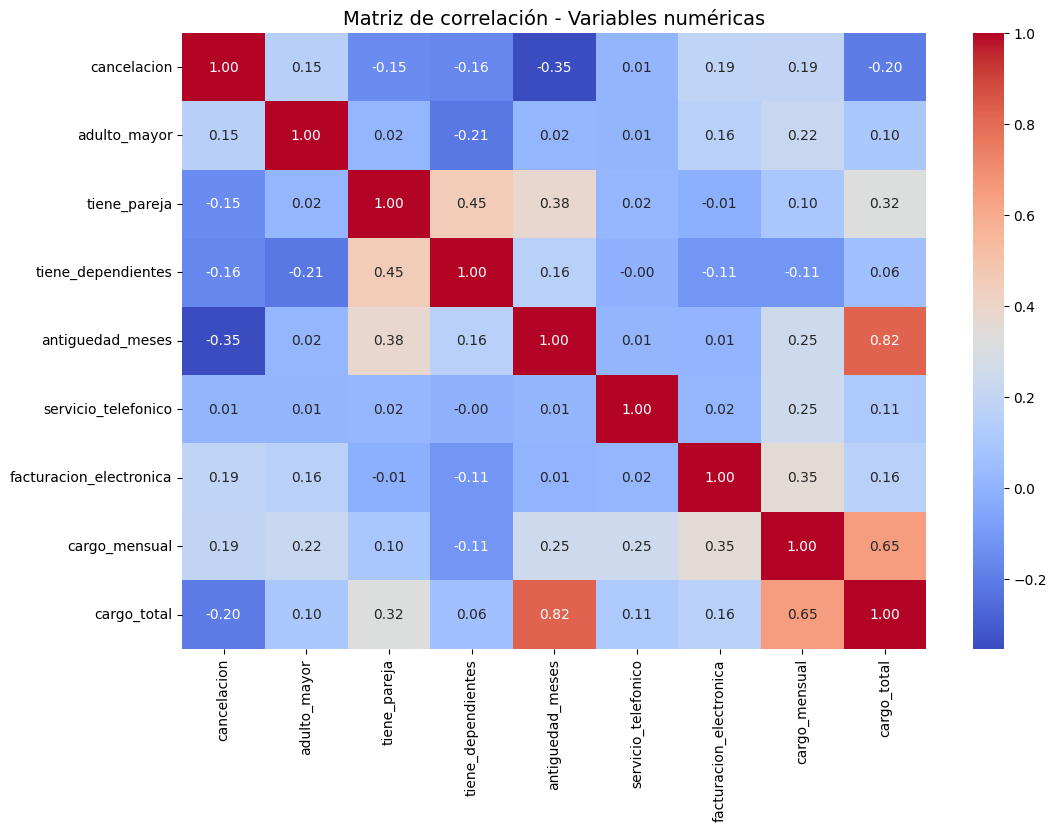

In [209]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Matriz de correlación - Variables numéricas", fontsize=14)
plt.show()

**MODELADO**

In [210]:
dummy = DummyClassifier()

In [211]:
dummy.fit(X_train, y_train)

DummyClassifier()

In [212]:
dummy.score(X_test, y_test)

0.7345635202271115

In [213]:
X = df.drop(columns=["cancelacion"])
y = df["cancelacion"]

In [214]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [215]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [216]:
arbol = DecisionTreeClassifier(random_state=42)
arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [217]:
score = arbol.score(X_test, y_test)
print("Accuracy en test:", score)

Accuracy en test: 0.7253371185237757


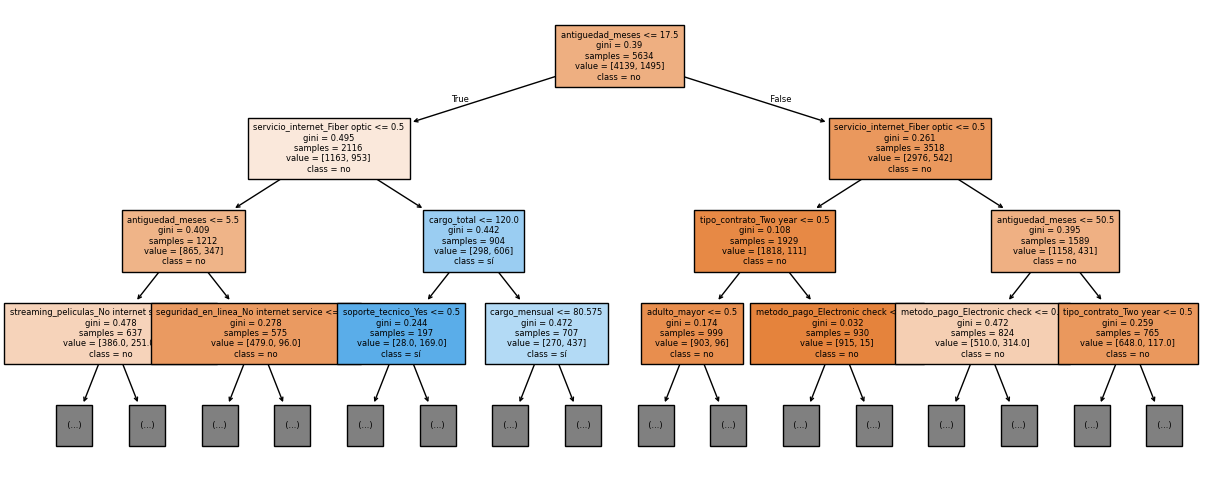

In [218]:
plt.figure(figsize=(15, 6))
plot_tree(
    arbol,
    filled=True,
    class_names=['no', 'sí'],         # etiquetas de salida
    feature_names=X_encoded.columns,  # nombres de variables
    fontsize=6,
    max_depth=3                       # 👈 límite de profundidad mostrado
)
plt.show()

In [219]:
print(df.columns)

Index(['cancelacion', 'genero', 'adulto_mayor', 'tiene_pareja',
       'tiene_dependientes', 'antiguedad_meses', 'servicio_telefonico',
       'lineas_multiples', 'servicio_internet', 'seguridad_en_linea',
       'respaldo_en_linea', 'proteccion_dispositivo', 'soporte_tecnico',
       'streaming_tv', 'streaming_peliculas', 'tipo_contrato',
       'facturacion_electronica', 'metodo_pago', 'cargo_mensual',
       'cargo_total'],
      dtype='object')


In [220]:
X = df[['antiguedad_meses', 'cargo_total', 'cargo_mensual']]
y = df['cancelacion']

*Grupo de entrenamiento y prueba*

In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

*Normalizando*

In [222]:
normalizacion = MinMaxScaler()

In [223]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

*Entrenar modelo*

In [224]:
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

*Evaluar*

In [225]:
y_pred = modelo.predict(X_test_scaled)

In [226]:
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[1361  201]
 [ 297  254]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1562
           1       0.56      0.46      0.50       551

    accuracy                           0.76      2113
   macro avg       0.69      0.67      0.68      2113
weighted avg       0.75      0.76      0.76      2113



*Desbalanceando*

In [227]:
print(df.columns)

Index(['cancelacion', 'genero', 'adulto_mayor', 'tiene_pareja',
       'tiene_dependientes', 'antiguedad_meses', 'servicio_telefonico',
       'lineas_multiples', 'servicio_internet', 'seguridad_en_linea',
       'respaldo_en_linea', 'proteccion_dispositivo', 'soporte_tecnico',
       'streaming_tv', 'streaming_peliculas', 'tipo_contrato',
       'facturacion_electronica', 'metodo_pago', 'cargo_mensual',
       'cargo_total'],
      dtype='object')


*Seleccionamos variables explicativas y objetivo*

In [228]:
X = df[['antiguedad_meses', 'cargo_total', 'cargo_mensual']]
y = df['cancelacion']

*Dividir en entrenamiento y prueba*

In [229]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

*Normalizamos variables*

In [230]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

*Aplicamos Smote solo al conjunto de entrenamiento*

In [231]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

*Entrenamos modelo con datos balanceados*

In [232]:
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train_bal, y_train_bal)

RandomForestClassifier(random_state=42)

*Hacemos predicciones en el conjunto de prueba*

In [233]:
y_pred = modelo.predict(X_test_scaled)

*Evaluamos el modelo*

In [234]:
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[1249  303]
 [ 247  314]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1552
           1       0.51      0.56      0.53       561

    accuracy                           0.74      2113
   macro avg       0.67      0.68      0.68      2113
weighted avg       0.75      0.74      0.74      2113



*Proporción de clases antes de aplicar SMOTE*

Text(0, 0.5, 'Cantidad')

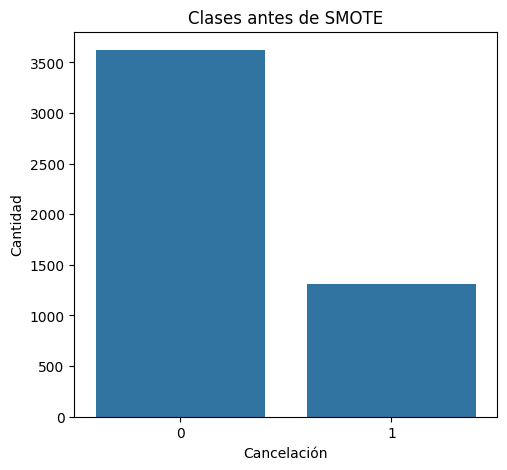

In [235]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Clases antes de SMOTE")
plt.xlabel("Cancelación")
plt.ylabel("Cantidad")

*Proporción de clases después de aplicar SMOTE*

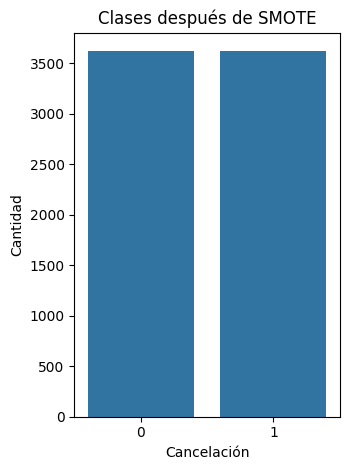

In [236]:
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_bal)
plt.title("Clases después de SMOTE")
plt.xlabel("Cancelación")
plt.ylabel("Cantidad")

plt.tight_layout()
plt.show()

Modelo del Árbol solo con 3 variable explicativas

In [237]:
X = df[['antiguedad_meses', 'cargo_total', 'cargo_mensual']]
y = df['cancelacion']

In [238]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [239]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [240]:
arbol = DecisionTreeClassifier(random_state=42, max_depth=3)
arbol.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [241]:
y_pred = arbol.predict(X_test_scaled)

In [242]:
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[1425  127]
 [ 330  231]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1552
           1       0.65      0.41      0.50       561

    accuracy                           0.78      2113
   macro avg       0.73      0.66      0.68      2113
weighted avg       0.77      0.78      0.77      2113



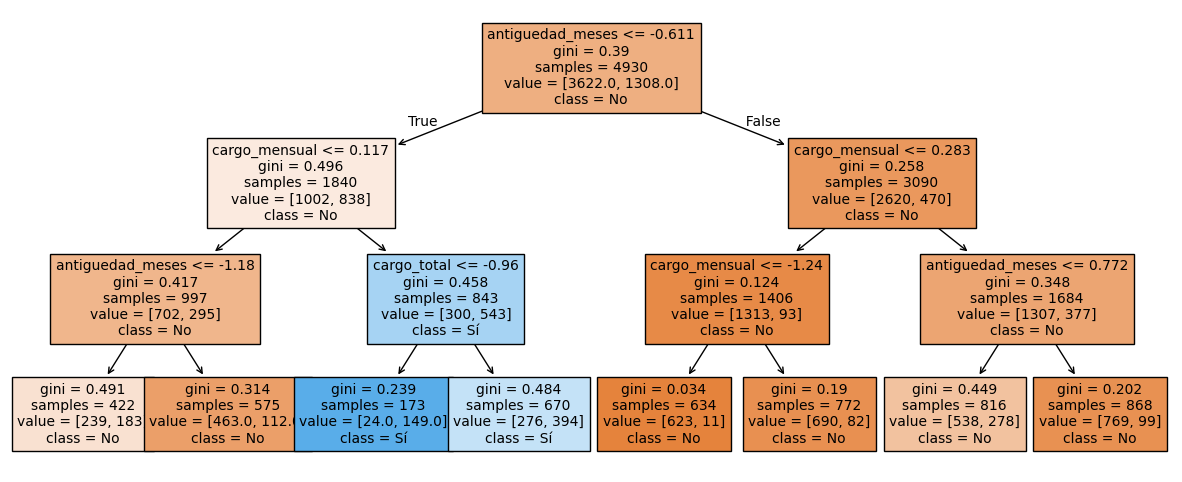

In [243]:
plt.figure(figsize=(15, 6))
plot_tree(arbol, feature_names=X.columns, class_names=['No', 'Sí'], filled=True, fontsize=10)
plt.show()

Modelo del Árbol con Smote

In [244]:
X = df[['antiguedad_meses', 'cargo_total', 'cargo_mensual']]
y = df['cancelacion']

In [245]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [246]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [247]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

In [248]:
arbol = DecisionTreeClassifier(random_state=42, max_depth=3)
arbol.fit(X_train_bal, y_train_bal)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [249]:
y_pred = arbol.predict(X_test_scaled)

In [250]:
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[1086  466]
 [ 138  423]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.70      0.78      1552
           1       0.48      0.75      0.58       561

    accuracy                           0.71      2113
   macro avg       0.68      0.73      0.68      2113
weighted avg       0.78      0.71      0.73      2113



**Modelo detectó en un 73% (Recall) los clientes que cancelaron.**

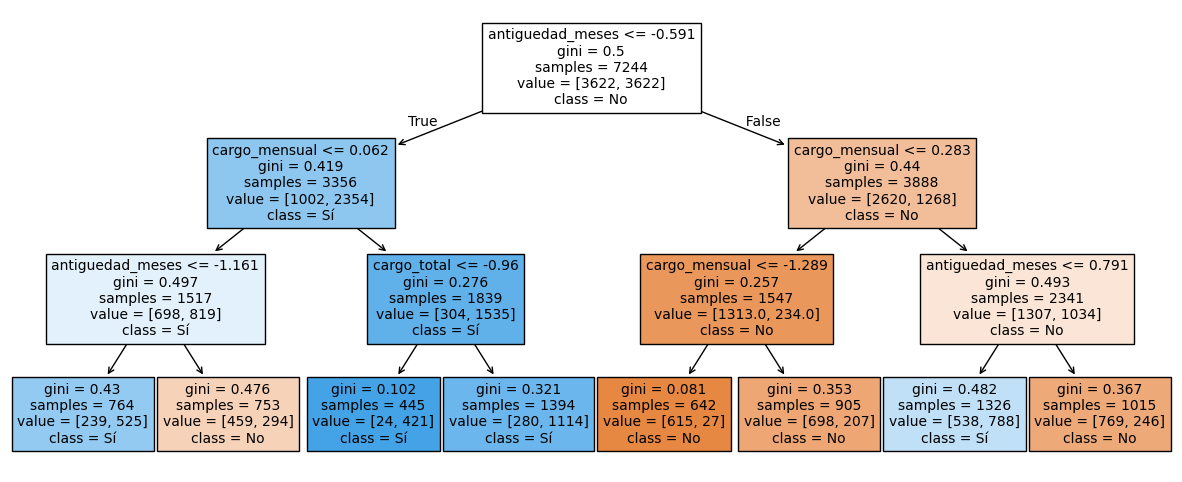

In [251]:
plt.figure(figsize=(15, 6))
plot_tree(arbol, feature_names=X.columns, class_names=['No', 'Sí'], filled=True, fontsize=10)
plt.show()

Modelo KNN

In [252]:
X = df[['antiguedad_meses', 'cargo_total', 'cargo_mensual']]
y = df['cancelacion']

In [253]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [254]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [255]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

In [256]:
knn = KNeighborsClassifier(n_neighbors=5)  # puedes ajustar el número de vecinos
knn.fit(X_train_bal, y_train_bal)

KNeighborsClassifier()

In [257]:
y_pred = knn.predict(X_test_scaled)

In [258]:
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[1136  416]
 [ 187  374]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79      1552
           1       0.47      0.67      0.55       561

    accuracy                           0.71      2113
   macro avg       0.67      0.70      0.67      2113
weighted avg       0.76      0.71      0.73      2113



**Modelo detectó en un 70% (recall) los clientes que cancelaron.**

**Modelo Random Forest**

In [259]:
X = df[['antiguedad_meses', 'cargo_total', 'cargo_mensual']]
y = df['cancelacion']

In [260]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [261]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [262]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

In [263]:
rf = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=42)
rf.fit(X_train_bal, y_train_bal)

RandomForestClassifier(max_depth=7, n_estimators=200, random_state=42)

In [264]:
y_pred = rf.predict(X_test_scaled)

In [265]:
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[1138  414]
 [ 157  404]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1552
           1       0.49      0.72      0.59       561

    accuracy                           0.73      2113
   macro avg       0.69      0.73      0.69      2113
weighted avg       0.78      0.73      0.74      2113



**Comparando los modelos**

In [266]:
X = df[['antiguedad_meses', 'cargo_total', 'cargo_mensual']]
y = df['cancelacion']

In [267]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Escalar variables

In [268]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Aplicar Smote

In [269]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

Entrenar Árbol de decisión

In [270]:
arbol = DecisionTreeClassifier(max_depth=5, random_state=42)
arbol.fit(X_train_bal, y_train_bal)
y_pred_arbol = arbol.predict(X_test_scaled)

Entrenar KNN

In [271]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_bal, y_train_bal)
y_pred_knn = knn.predict(X_test_scaled)

Entrenar Random Forest

In [272]:
rf = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=42)
rf.fit(X_train_bal, y_train_bal)
y_pred_rf = rf.predict(X_test_scaled)

Evaaluamos modelos

Vamos a calcular matriz de confusión, precision, recall y F1-score para cada modelo:

In [273]:
modelos = {
    "Árbol de decisión": y_pred_arbol,
    "KNN": y_pred_knn,
    "Random Forest": y_pred_rf
}
for nombre, y_pred in modelos.items():
    print(f"--- {nombre} ---")
    print("Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred))
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_pred))
    print("\n")

--- Árbol de decisión ---
Matriz de confusión:
[[1058  494]
 [ 137  424]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.68      0.77      1552
           1       0.46      0.76      0.57       561

    accuracy                           0.70      2113
   macro avg       0.67      0.72      0.67      2113
weighted avg       0.77      0.70      0.72      2113



--- KNN ---
Matriz de confusión:
[[1136  416]
 [ 187  374]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79      1552
           1       0.47      0.67      0.55       561

    accuracy                           0.71      2113
   macro avg       0.67      0.70      0.67      2113
weighted avg       0.76      0.71      0.73      2113



--- Random Forest ---
Matriz de confusión:
[[1138  414]
 [ 157  404]]
Reporte de clasificación:
              precision    recall  f1-score   support

     

Modelo Regresión Logística

In [274]:
X = df[['antiguedad_meses', 'cargo_total', 'cargo_mensual']]
y = df['cancelacion']

In [275]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [276]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [277]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

In [278]:
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_bal, y_train_bal)

LogisticRegression(max_iter=1000, random_state=42)

In [279]:
y_pred = logreg.predict(X_test_scaled)

In [280]:
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[1109  443]
 [ 152  409]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.71      0.79      1552
           1       0.48      0.73      0.58       561

    accuracy                           0.72      2113
   macro avg       0.68      0.72      0.68      2113
weighted avg       0.77      0.72      0.73      2113



In [281]:
y_train_pred = rf.predict(X_train_bal)
y_test_pred = y_pred_rf

In [282]:
from sklearn.metrics import f1_score
print("F1-score en entrenamiento:", f1_score(y_train_bal, y_train_pred))
print("F1-score en prueba:", f1_score(y_test, y_test_pred))

F1-score en entrenamiento: 0.7993088782562466
F1-score en prueba: 0.5859318346627991


In [283]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [284]:
resultados = {
    "Modelo": [],
    "Conjunto": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-score": []
}

In [285]:
modelos_test = {
    "Árbol de decisión": y_pred_arbol,
    "KNN": y_pred_knn,
    "Random Forest": y_pred_rf,
    "Regresión Logística": y_pred
}

Diccionario de predicciones de entrenamiento

In [286]:
modelos_train = {
    "Árbol de decisión": arbol.predict(X_train_bal),
    "KNN": knn.predict(X_train_bal),
    "Random Forest": rf.predict(X_train_bal),
    "Regresión Logística": logreg.predict(X_train_bal)
}

Calculando metricas

In [287]:
for nombre in modelos_test.keys():
 y_train_pred = modelos_train[nombre]
 resultados["Modelo"].append(nombre)
 resultados["Conjunto"].append("Entrenamiento")
 resultados["Accuracy"].append(accuracy_score(y_train_bal, y_train_pred))
 resultados["Precision"].append(round(precision_score(y_train_bal, y_train_pred),3))
 resultados["Recall"].append(round(recall_score(y_train_bal, y_train_pred),3))
 resultados["F1-score"].append(round(f1_score(y_train_bal, y_train_pred),3))

In [288]:
y_test_pred = modelos_test[nombre]
resultados["Modelo"].append(nombre)
resultados["Conjunto"].append("Prueba")
resultados["Accuracy"].append(round(accuracy_score(y_test, y_test_pred),3))
resultados["Precision"].append(round(precision_score(y_test, y_test_pred),3))
resultados["Recall"].append(round(recall_score(y_test, y_test_pred),3))
resultados["F1-score"].append(round(f1_score(y_test, y_test_pred),3))


In [289]:
df_over_under = pd.DataFrame(resultados)
print(df_over_under)

                Modelo       Conjunto  Accuracy  Precision  Recall  F1-score
0    Árbol de decisión  Entrenamiento  0.762010      0.732   0.826     0.776
1                  KNN  Entrenamiento  0.852706      0.821   0.903     0.860
2        Random Forest  Entrenamiento  0.791552      0.771   0.830     0.799
3  Regresión Logística  Entrenamiento  0.733020      0.729   0.741     0.735
4  Regresión Logística         Prueba  0.718000      0.480   0.729     0.579


Buen Ajuste métricas similares y relativamente altas en ambos conjuntos (Entrenamiento- Pruebas)

In [290]:
print(f'Exactitud KNN: {knn.score(X_test, y_test)}')
print(f'Exactitud Random Forest: {rf.score(X_test, y_test)}')

Exactitud KNN: 0.73450070989115
Exactitud Random Forest: 0.7335541883577852


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



Con los datos evaluados se decidió evaluar tres variables que tenían mayor correlación respecto a cancelación, los modelos reflejaron que la antiguedad puede ser un indicador fuerte de la cancelación de un cliente, es decir a menor antiguedad mayor indice de cancelación en los servicios de Telecom X. En el Gráfico de Modelo R.F. se muestran las tres variables con mayor importancia que influye más en la probabilidad de que un cliente cancele.
Recomendaciones, para disminuir cancelaciones:

**Riesgo cancelación en clientes con menos antiguedad, como acciones a seguir podemos ofrecer:**

-Onboarding personalizado y seguimiento inicial.

-Incentivos para primeros meses (descuentos, beneficios extras).

-Comunicación proactiva para ver satisfacción de clientes o si existe algún problema que pueda influir en cancelación de servicios.

**Riesgo por cancelación total facturado, como acciones a seguir:**

-Revisar planes y facturación, ofrecer planes más flexibles, descuentos por fidelidad, acumulación de beneficios.

-Comunicación proactiva para ver satisfacción de clientes o si existe algún problema que pueda influir en cancelación de servicios.

**Riesgo por cancelación pago mensual alto, como acciones a seguir:**

-Opciones de fraccionamiento.

-Comunicación proactiva para ver satisfacción de clientes o si existe algún problema que pueda influir en cancelación de servicios.



In [291]:
importancia = rf.feature_importances_
variables = ['antiguedad_meses', 'cargo_total', 'cargo_mensual']

In [292]:
df_importancia = pd.DataFrame({
    'Variable': variables,
    'Importancia': importancia
}).sort_values(by='Importancia', ascending=False)

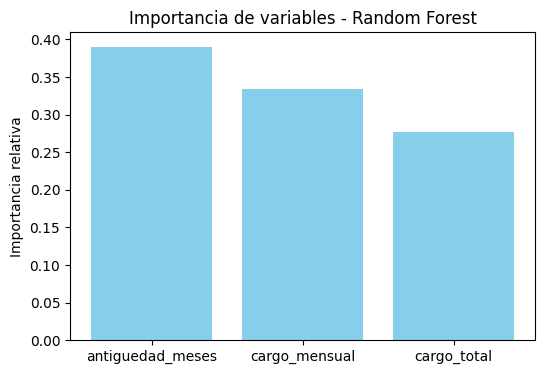

In [293]:
plt.figure(figsize=(6,4))
plt.bar(df_importancia['Variable'], df_importancia['Importancia'], color='skyblue')
plt.title("Importancia de variables - Random Forest")
plt.ylabel("Importancia relativa")
plt.show()